In [1]:
import pandas as pd

In [2]:
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


train = pd.read_csv(train_url,header=None, names = col_names)

test = pd.read_csv(test_url, header=None, names = col_names)

In [4]:
train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:
# Check for missing values
missing_values = train.isnull().sum()

# Check for duplicate rows
duplicates = train.duplicated().sum()

missing_values, duplicates

(duration                       0
 protocol_type                  0
 service                        0
 flag                           0
 src_bytes                      0
 dst_bytes                      0
 land                           0
 wrong_fragment                 0
 urgent                         0
 hot                            0
 num_failed_logins              0
 logged_in                      0
 num_compromised                0
 root_shell                     0
 su_attempted                   0
 num_root                       0
 num_file_creations             0
 num_shells                     0
 num_access_files               0
 num_outbound_cmds              0
 is_host_login                  0
 is_guest_login                 0
 count                          0
 srv_count                      0
 serror_rate                    0
 srv_serror_rate                0
 rerror_rate                    0
 srv_rerror_rate                0
 same_srv_rate                  0
 diff_srv_rate

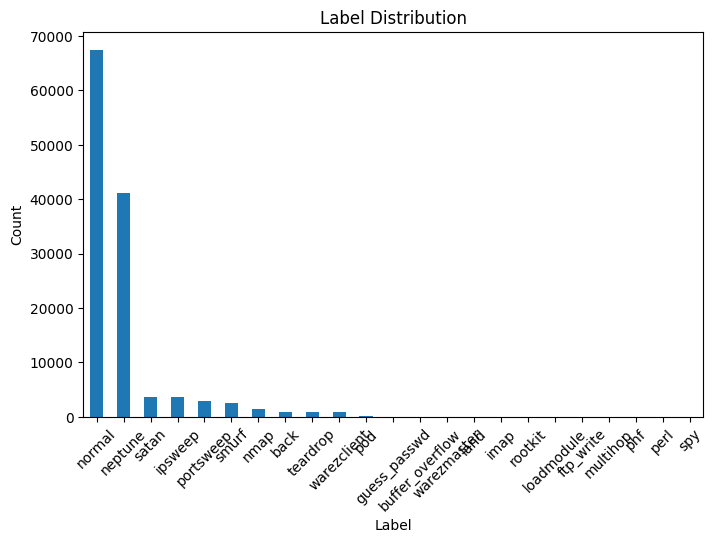

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = train['label'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [9]:
label_counts

label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

In [10]:
for i in train:
    print("-------")
    print(i)
    print("-------")
    print(train[i].unique())
    print("\n\n")

-------
duration
-------
[    0  5607   507 ...  5430 11680   679]



-------
protocol_type
-------
['tcp' 'udp' 'icmp']



-------
service
-------
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']



-------
flag
-------
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']



-------
src_bytes
-------
[  491   146     0 ...  2816 11466  2358]



-------
dst_bytes
-------
[    0  8153   420 ...  5424 17655 52866]

In [12]:
column_grouped = {} #columns grouped by number of different values everything 5+ is merged
vals = {}
for i in train:
    val_of_i = train[i].unique()
    vals[i] = val_of_i
    count = "many" if len(val_of_i) > 5 else str(len(val_of_i))
    if count in column_grouped:
        column_grouped[count] += [i]
    else:
        column_grouped[count] = [i]

column_grouped

{'many': ['duration',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'hot',
  'num_failed_logins',
  'num_compromised',
  'num_root',
  'num_file_creations',
  'num_access_files',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'label'],
 '3': ['protocol_type', 'wrong_fragment', 'su_attempted', 'num_shells'],
 '2': ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login'],
 '4': ['urgent'],
 '1': ['num_outbound_cmds']}

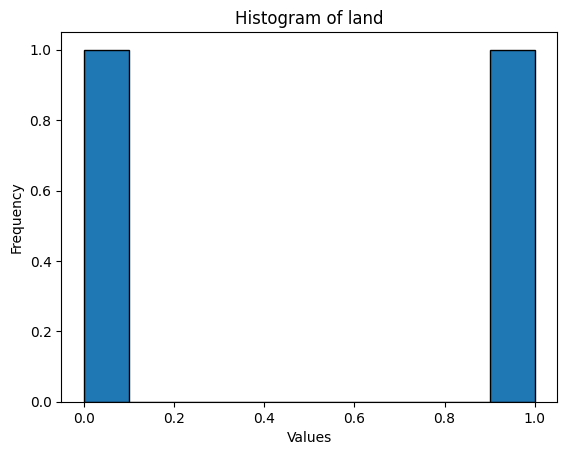

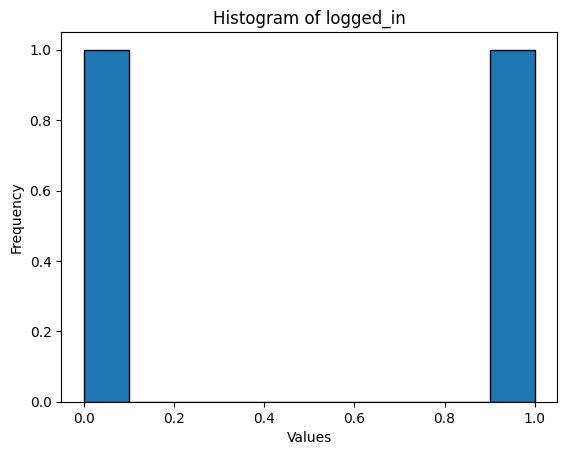

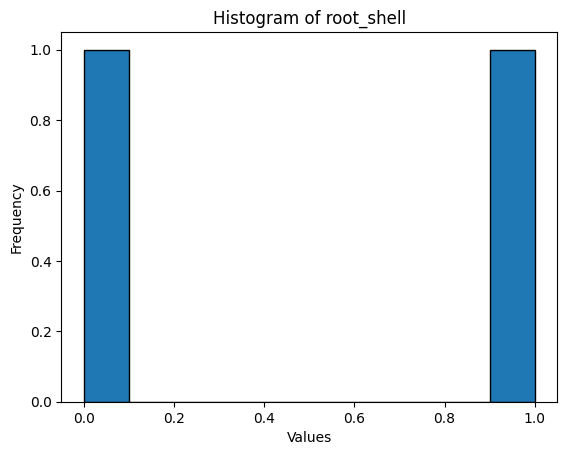

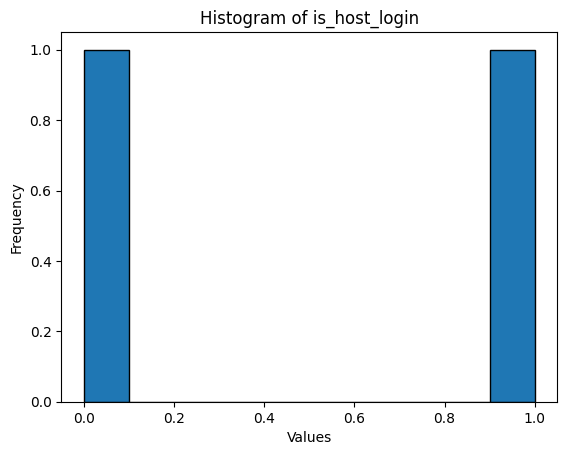

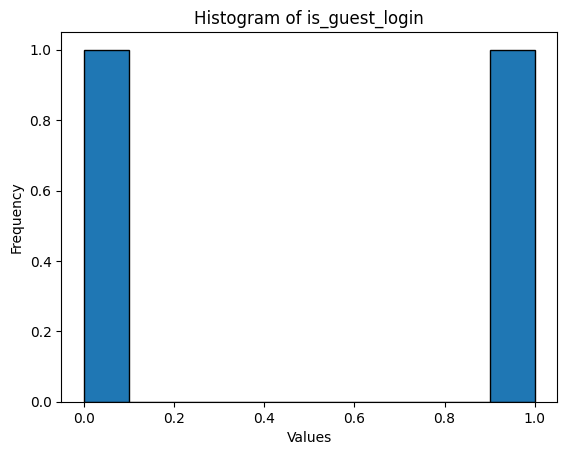

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

for i in column_grouped['2']:
    plt.hist(vals[i], bins=10, edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


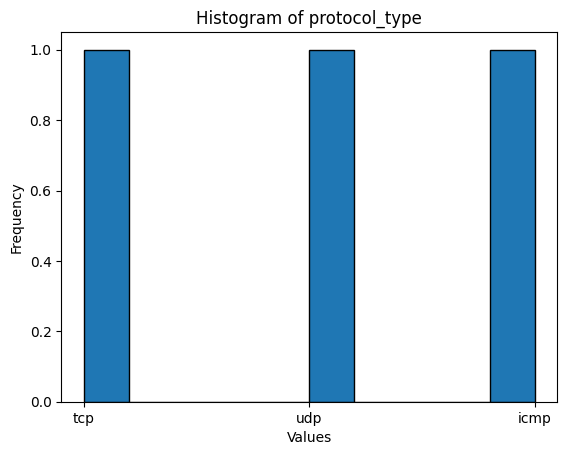

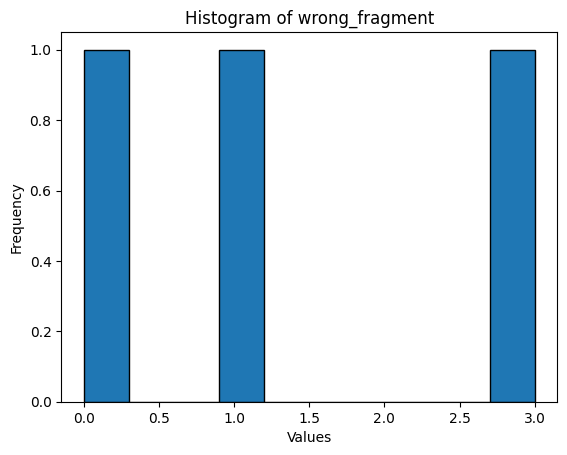

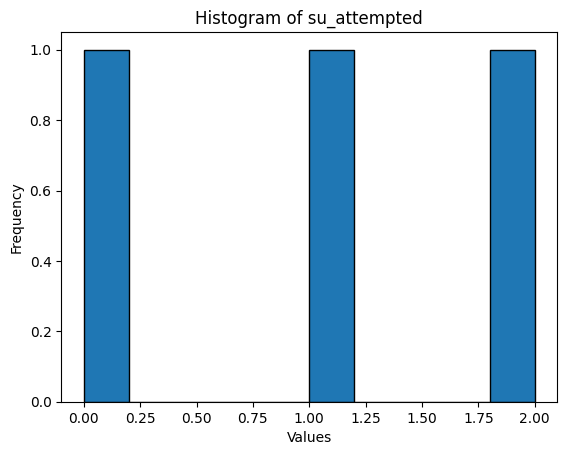

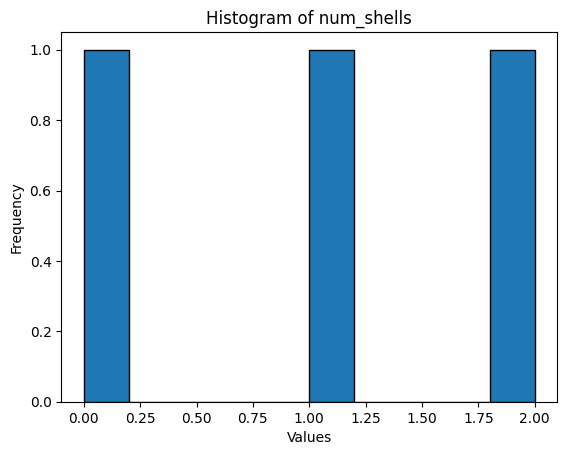

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

for i in column_grouped['3']:
    plt.hist(vals[i], bins=10, edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


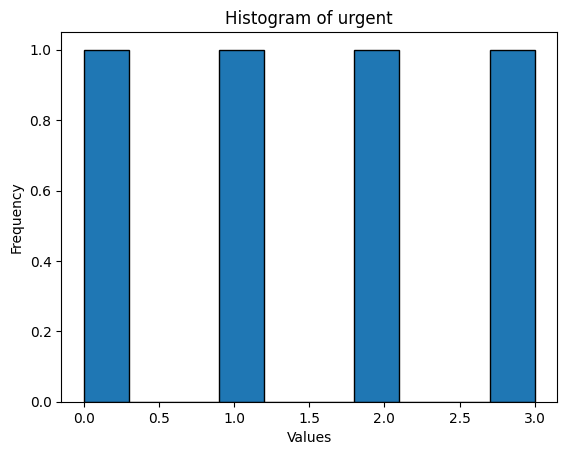

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

for i in column_grouped['4']:
    plt.hist(vals[i], bins=10, edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()


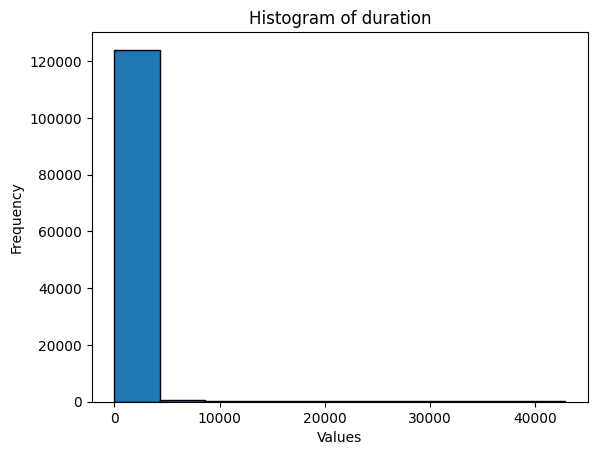

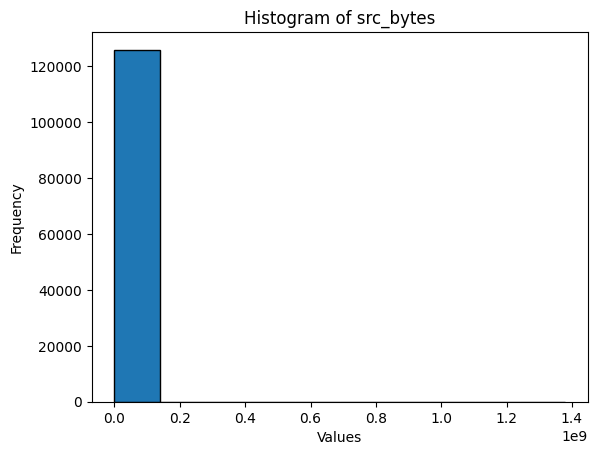

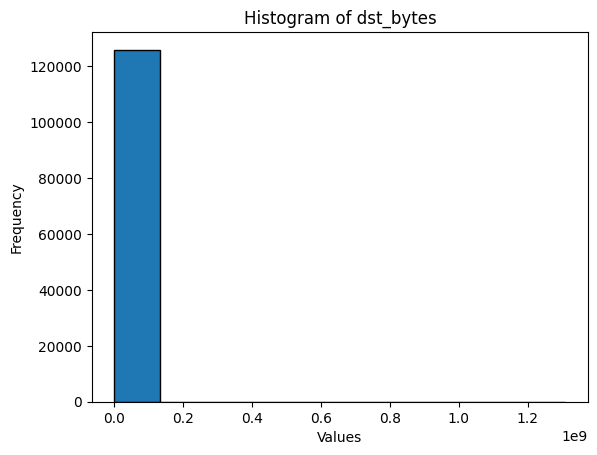

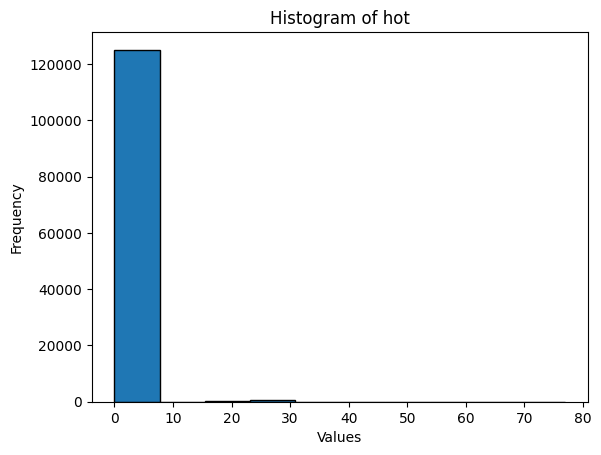

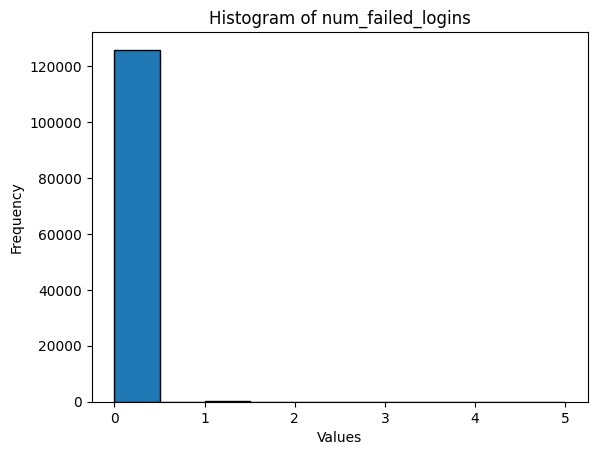

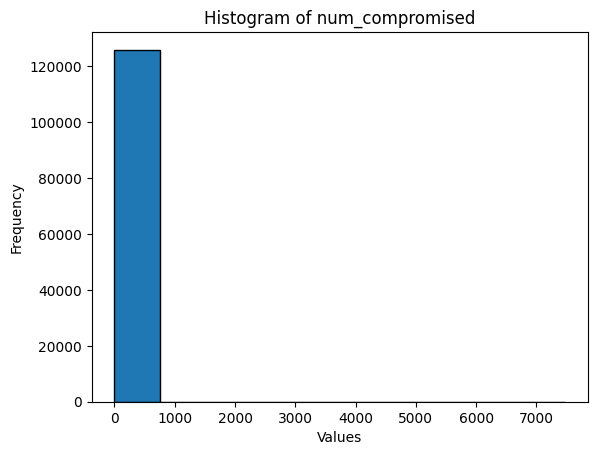

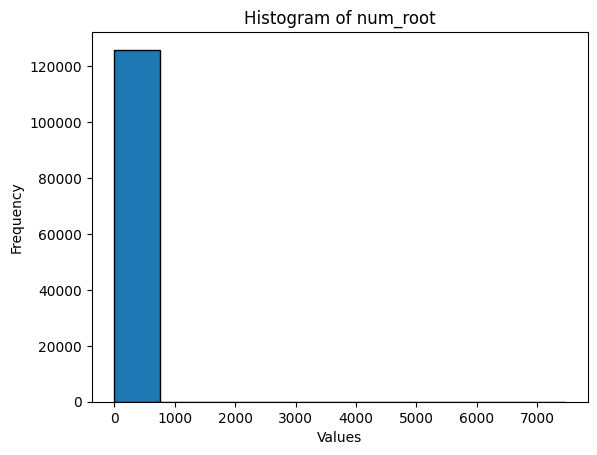

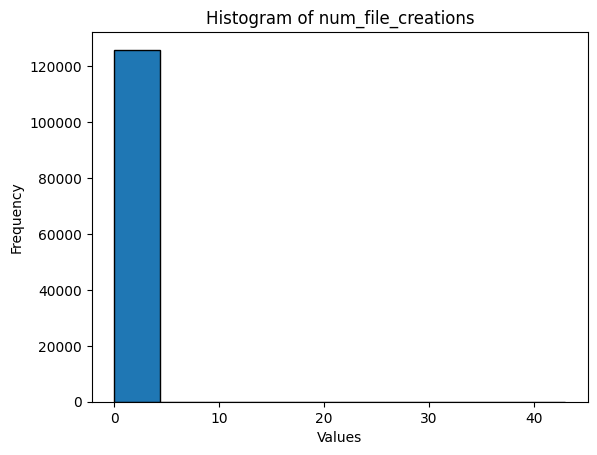

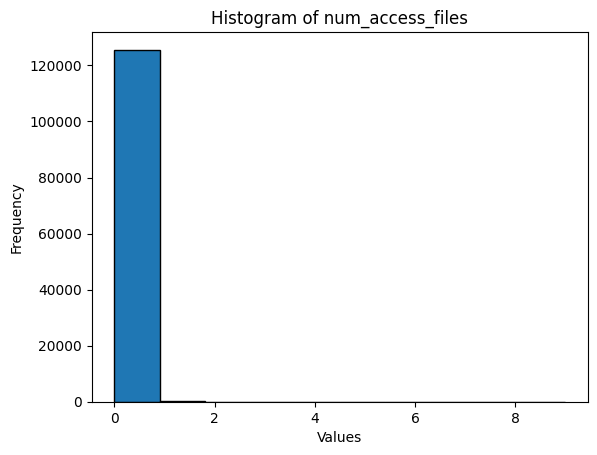

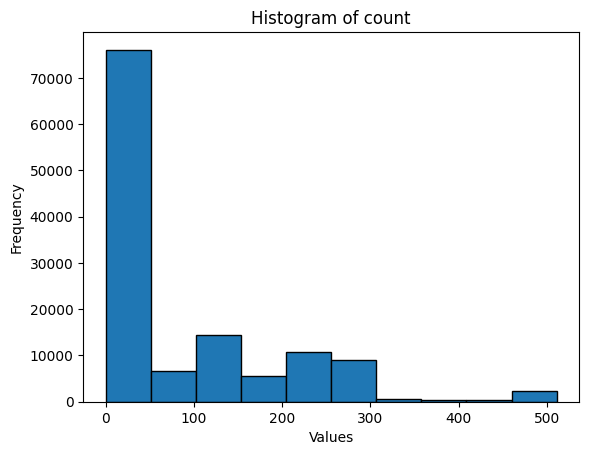

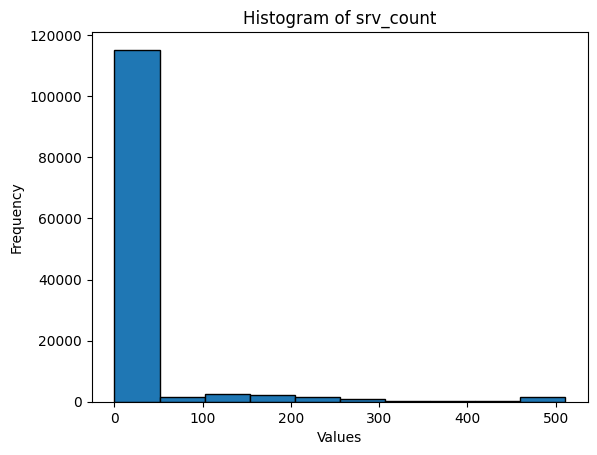

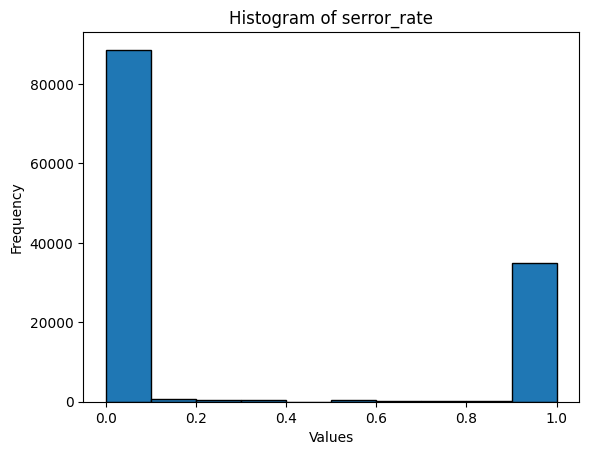

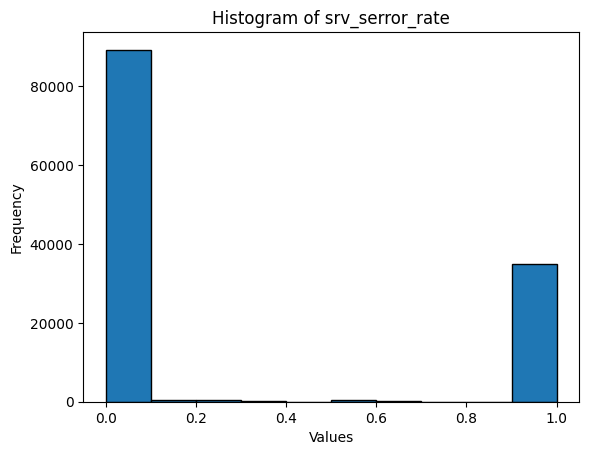

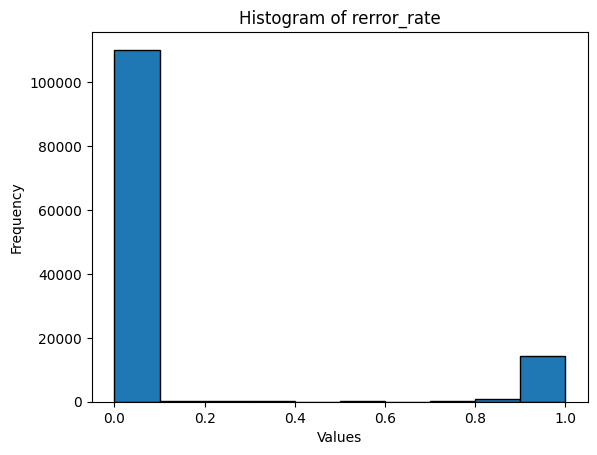

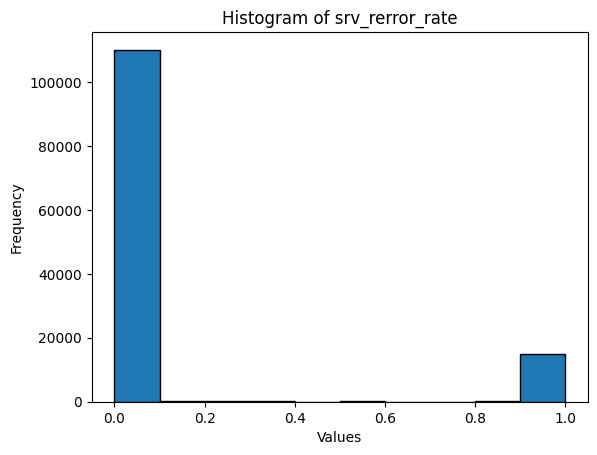

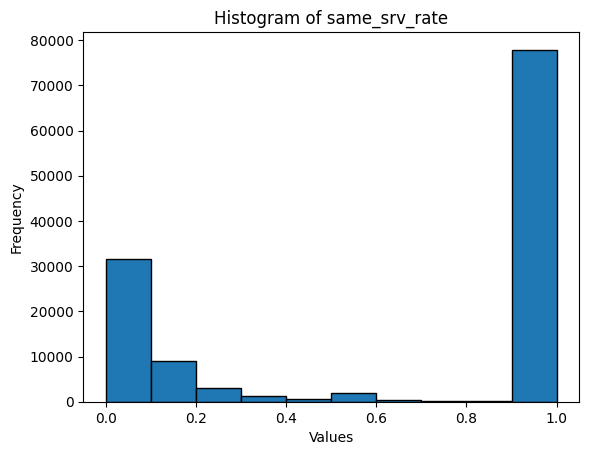

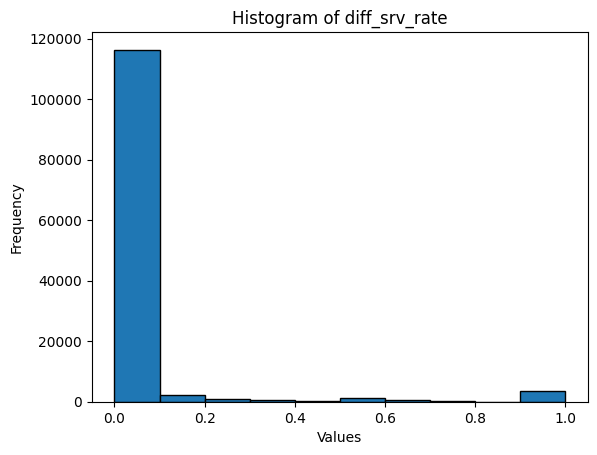

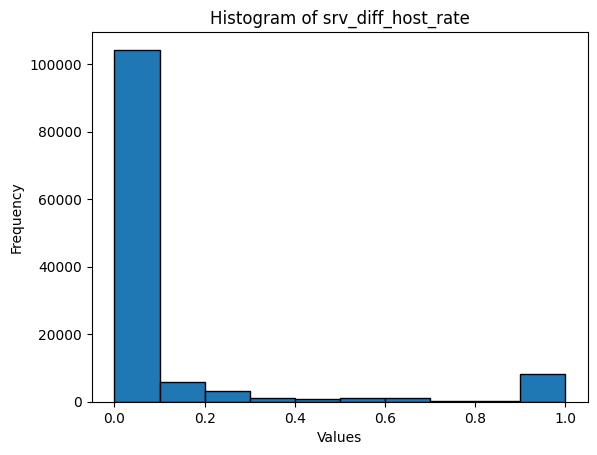

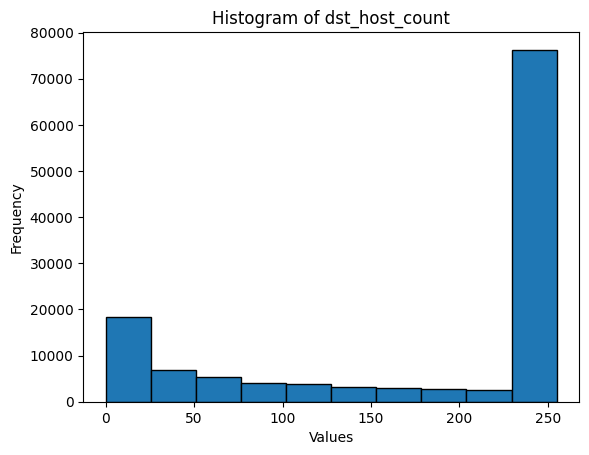

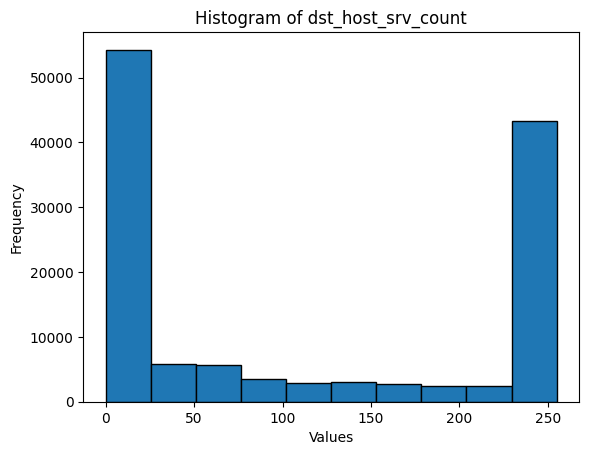

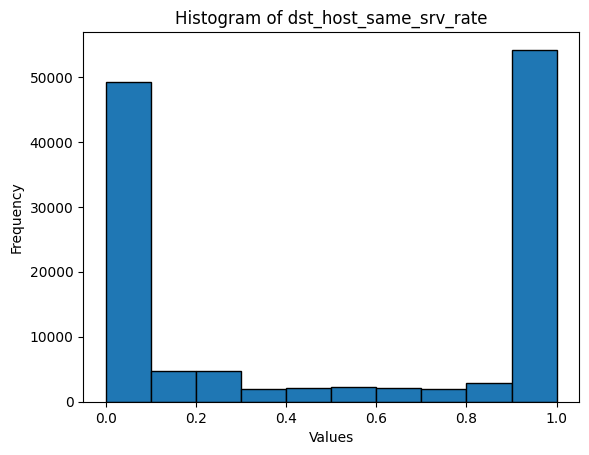

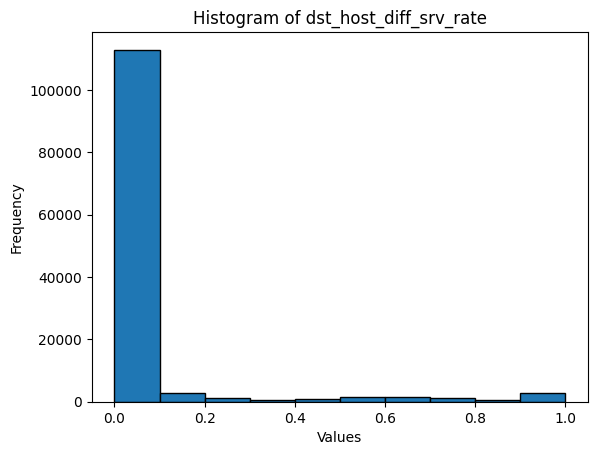

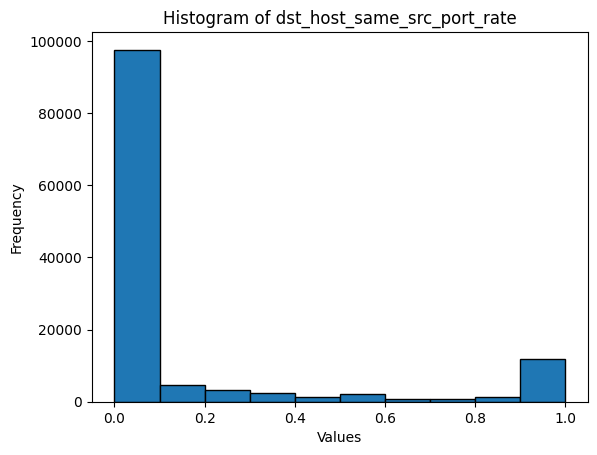

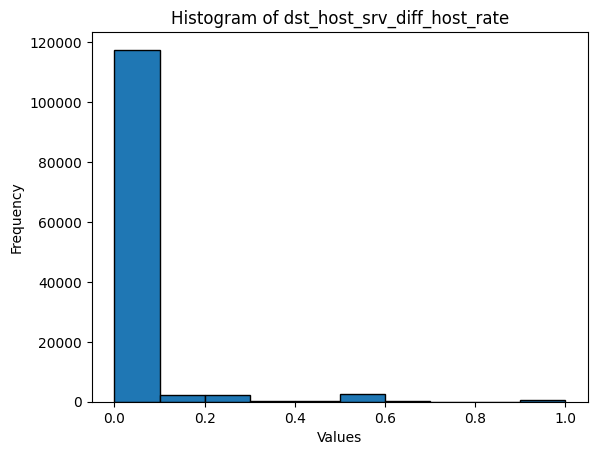

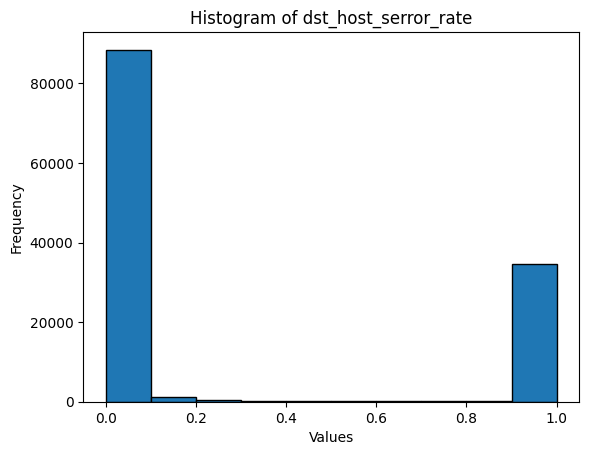

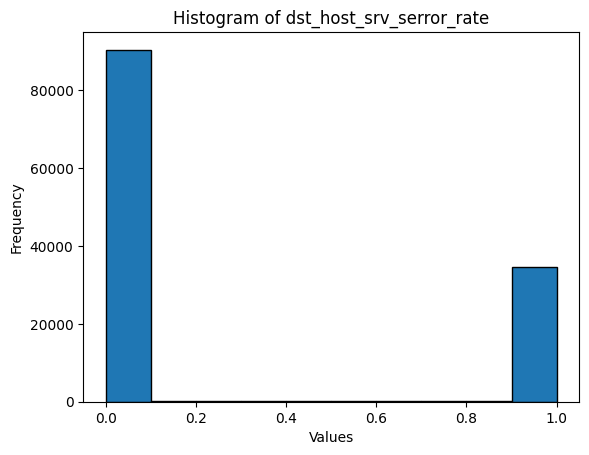

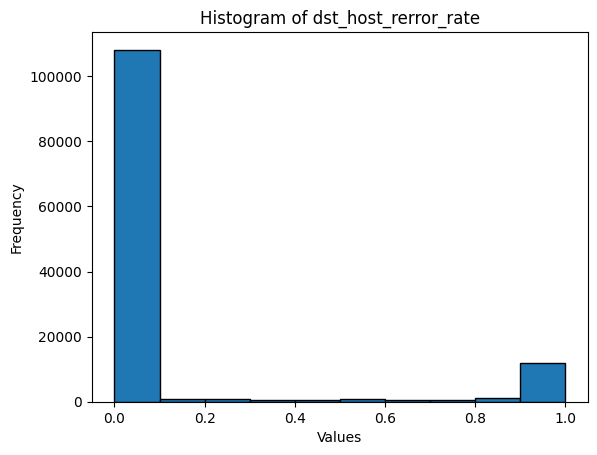

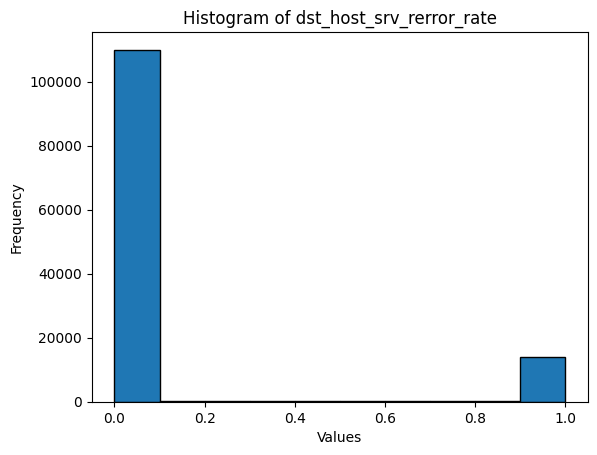

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# histogram is boring for this
for i in column_grouped['many']:
    if i == "service" or i == "flag" or i =="label": #all string columns
        continue
    plt.hist(train[i], bins=10, edgecolor='black')
    plt.title(f'Histogram of {i}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

In [17]:
for i in column_grouped['many']:
    if i == 'label':
        continue
    print(i)
    print(vals[i])
    print("\n")
    
#we notice service, label  and flag are string

duration
[    0  5607   507 ...  5430 11680   679]


service
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']


flag
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


src_bytes
[  491   146     0 ...  2816 11466  2358]


dst_bytes
[    0  8153   420 ...  5424 17655 52866]


hot
[ 0  5  6  4  2  1 28 30 22 24 14  3 15 25 19 18 77 17 11  7 20 12  9 10
  8 21 33 44]


num_failed_logins
[0 2 1 3 4 5]


num_comp

/tmp/ipykernel_36/4215686653.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(data)
/tmp/ipykernel_36/4215686653.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(data)
/tmp/ipykernel_36/4215686653.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans.fit(data)
/tmp/ipykernel_36/4215686653.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans.fit(data)


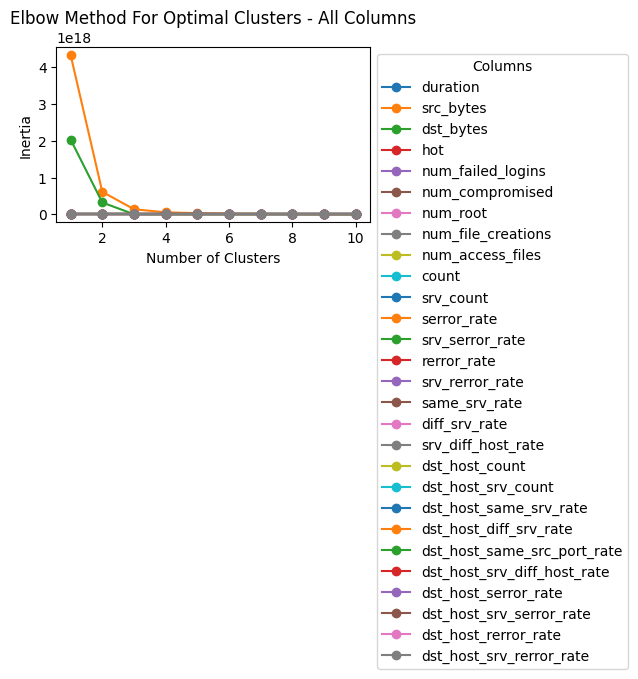

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'column_grouped' and 'train' DataFrames are defined
legend_labels = []  # List to store legend labels

for i in column_grouped['many']:
    if i == "service" or i == "flag" or i == "label":
        continue

    # Use the current column for clustering
    data = train[[i]].values.reshape(-1, 1)

    # Using the Elbow Method to find the optimal number of clusters
    inertia = []
    cluster_range = range(1, 11)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=10)  # Set n_init explicitly
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)

    # Plotting the Elbow Curve for the current column
    plt.plot(cluster_range, inertia, marker='o', label=f'{i}')
    legend_labels.append(i)  # Add the column name to the legend labels list

# Configure the overall plot
plt.title('Elbow Method For Optimal Clusters - All Columns')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Placing the legend outside the graph bounds
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Columns')  # Adjust the position as needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [20]:
import pandas as pd
from sklearn.cluster import KMeans

# Initialize an empty dictionary to store results
cluster_dict = {}

# Assuming 'column_grouped' and 'train' DataFrames are defined
for i in column_grouped['many']:
    if i == "service" or i == "flag" or i == "label":
        continue

    # Use the current column for clustering
    data = train[[i]].values.reshape(-1, 1)

    # Fit KMeans to the data
    kmeans = KMeans(n_clusters=3, n_init=10)  # Adjust n_clusters based on your elbow method
    kmeans.fit(data)

    # Get the cluster labels
    cluster_labels = kmeans.labels_

    # Calculate cluster averages
    cluster_averages = {}
    for cluster in range(kmeans.n_clusters):
        # Get all data points assigned to this cluster
        cluster_data = data[cluster_labels == cluster]
        # Calculate the average
        cluster_average = cluster_data.mean()  # This will be a scalar value
        # Store the average in the dictionary
        cluster_averages[cluster] = cluster_average  # No indexing needed

    # Store the cluster averages in the main dictionary
    cluster_dict[i] = cluster_averages


In [21]:
cluster_dict

{'duration': {0: 35.4734388063541,
  1: 35032.17374517374,
  2: 12806.392285983067},
 'src_bytes': {0: 11876.369697065922, 1: 1273741692.5, 2: 565551131.0},
 'dst_bytes': {0: 3025.4414543145194, 1: 1309937401.0, 2: 400291060.0},
 'hot': {0: 0.03657747345376681, 1: 28.52718286655684, 2: 18.6280193236715},
 'num_failed_logins': {0: 0.0, 1: 1.079646017699115, 2: 3.5555555555555554},
 'num_compromised': {0: 0.05291492639235179, 1: 7479.0, 2: 618.6764705882352},
 'num_root': {0: 0.053590712742980565, 1: 7468.0, 2: 662.5277777777778},
 'num_file_creations': {0: 0.0027242978777481256,
  1: 30.45,
  2: 13.142857142857142},
 'num_access_files': {0: 0.0, 1: 5.761904761904762, 2: 1.1285714285714286},
 'count': {0: 15.129701226072665,
  1: 203.48064169440877,
  2: 478.59568567026196},
 'srv_count': {0: 10.168910061432745,
  1: 482.0524658971668,
  2: 188.82091378841446},
 'serror_rate': {0: 0.9986006204286081,
  1: 0.0021642793196060875,
  2: 0.37678861788617884},
 'srv_serror_rate': {0: 0.0008396

In [22]:
print("Cluster Dictionary\n\n")
for column_name, averages in cluster_dict.items():
    pr = ""
    pr = pr + (f"Column name: {column_name}")
    pr = pr + '\n'
    pr = pr + str("Cluster values: " + str(list(averages.values())))
    pr = pr + ("\nColumn Statistics:\n")
    pr = pr + str(train[column_name].describe())
    print(pr)
    print("\n")
#     prompts.append(gen_prompt(pr, txt))

#{"duration" : ["short", "medium", "long"]}

Cluster Dictionary


Column name: duration
Cluster values: [35.4734388063541, 35032.17374517374, 12806.392285983067]
Column Statistics:
count    125973.00000
mean        287.14465
std        2604.51531
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max       42908.00000
Name: duration, dtype: float64


Column name: src_bytes
Cluster values: [11876.369697065922, 1273741692.5, 565551131.0]
Column Statistics:
count    1.259730e+05
mean     4.556674e+04
std      5.870331e+06
min      0.000000e+00
25%      0.000000e+00
50%      4.400000e+01
75%      2.760000e+02
max      1.379964e+09
Name: src_bytes, dtype: float64


Column name: dst_bytes
Cluster values: [3025.4414543145194, 1309937401.0, 400291060.0]
Column Statistics:
count    1.259730e+05
mean     1.977911e+04
std      4.021269e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.160000e+02
max      1.309937e+09
Name: dst_bytes, dtype: float64


Column name: hot
Cluste

In [23]:
many_translator = {
    "num_access_files": ["none", "few", "some"],
    "count": ["few", "many", "very many"],
    "srv_count": ["few", "many", "very many"],
    "serror_rate": ["none", "low", "high"],
    "srv_serror_rate": ["none", "low", "high"],
    "rerror_rate": ["none", "low", "moderate"],
    "srv_rerror_rate": ["none", "low", "moderate"],
    "same_srv_rate": ["high", "moderate", "low"],
    "diff_srv_rate": ["none", "low", "moderate"],
    "srv_diff_host_rate": ["none", "low", "moderate"],
    "dst_host_count": ["few", "many", "very many"],
    "dst_host_srv_count": ["few", "many", "very many"],
    "dst_host_same_srv_rate": ["high", "moderate", "low"],
    "dst_host_diff_srv_rate": ["none", "low", "moderate"],
    "dst_host_same_src_port_rate": ["none", "low", "moderate"],
    "dst_host_srv_diff_host_rate": ["none", "low", "moderate"],
    "dst_host_serror_rate": ["none", "low", "moderate"],
    "dst_host_srv_serror_rate": ["none", "low", "moderate"],
    "duration": ["short", "medium", "long"],
    "src_bytes": ["low", "high", "very high"],
    "dst_bytes": ["low", "high", "very high"],
    "hot": ["low", "moderate", "high"],
    "num_failed_logins": ["none", "few", "many"],
    "num_compromised": ["none", "few", "many"],
    "num_root": ["none", "few", "many"],
    "num_file_creations": ["none", "few", "many"],
    "dst_host_srv_rerror_rate": ["low", "high", "medium"],
    "dst_host_rerror_rate": ["low", "high", "medium"]
}


In [24]:
colClusters = {'duration': {0: 35.4734388063541, 1: 35032.17374517374, 2: 12806.392285983067}, 'src_bytes': {0: 11876.369697065922, 1: 1273741692.5, 2: 565551131.0}, 'dst_bytes': {0: 3025.4414543145194, 1: 1309937401.0, 2: 400291060.0}, 'hot': {0: 0.036657078938958136, 1: 19.99270072992701, 2: 29.098330241187384}, 'num_failed_logins': {0: 0.0, 1: 1.079646017699115, 2: 3.5555555555555554}, 'num_compromised': {0: 0.05291492639235179, 1: 7479.0, 2: 618.6764705882352}, 'num_root': {0: 0.053590712742980565, 1: 7468.0, 2: 662.5277777777778}, 'num_file_creations': {0: 0.0027242978777481256, 1: 30.45, 2: 13.142857142857142}, 'num_access_files': {0: 0.0, 1: 5.761904761904762, 2: 1.1285714285714286}, 'count': {0: 203.48064169440877, 1: 15.129701226072665, 2: 478.59568567026196}, 'srv_count': {0: 10.168910061432745, 1: 482.0524658971668, 2: 188.82091378841446}, 'serror_rate': {0: 0.002164279319606088, 1: 0.9986006204286081, 2: 0.37678861788617884}, 'srv_serror_rate': {0: 0.0008396725187944765, 1: 0.9993983396570906, 2: 0.3778357030015798}, 'rerror_rate': {0: 0.0002492723134538135, 1: 0.9837379155078797, 2: 0.3858135593220339}, 'srv_rerror_rate': {0: 0.000562940009241893, 1: 0.9983004613224578, 2: 0.4192758089368259}, 'same_srv_rate': {0: 0.9987899700943178, 1: 0.06699466056445463, 2: 0.39777662337662334}, 'diff_srv_rate': {0: 0.02365053122744591, 1: 0.9893733189887035, 2: 0.4669970939618986}, 'srv_diff_host_rate': {0: 0.006998911077479605, 1: 0.9579618239660658, 2: 0.3017349309206505}, 'dst_host_count': {0: 24.443665891752072, 1: 252.44966677482964, 2: 128.8078531294917}, 'dst_host_srv_count': {0: 15.52310238680836, 1: 249.73841548256524, 2: 123.77929743737403}, 'dst_host_same_srv_rate': {0: 0.9848886777787375, 1: 0.0600212674727725, 2: 0.526216105597053}, 'dst_host_diff_srv_rate': {0: 0.03424275349919578, 1: 0.9101315192743765, 2: 0.5200876255610174}, 'dst_host_same_src_port_rate': {0: 0.01597082431501199, 1: 0.9646946510297484, 2: 0.3969580263451663}, 'dst_host_srv_diff_host_rate': {0: 0.010806821116470482, 1: 0.4001727778844308, 2: 0.9899724137931035}, 'dst_host_serror_rate': {0: 0.00412573608137045, 1: 0.9966572472455328, 2: 0.42863529411764706}, 'dst_host_srv_serror_rate': {0: 0.0015082129864403043, 1: 0.9988477615382397, 2: 0.5151393728222997}, 'dst_host_rerror_rate': {0: 0.002822842072489515, 1: 0.969109005435581, 2: 0.4649635730123536}, 'dst_host_srv_rerror_rate': {0: 0.0013670954883131003, 1: 0.9926024759284732, 2: 0.5352706552706552}}

In [25]:
# column_grouped = {} #columns grouped by number of different values everything 5+ is merged
# vals = {}
# for i in train:
#     val_of_i = train[i].unique()
#     vals[i] = val_of_i
#     count = "many" if len(val_of_i) > 5 else str(len(val_of_i))
#     if count in column_grouped:
#         column_grouped[count] += [i]
#     else:
#         column_grouped[count] = [i]

cg = {'many': ['duration',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'hot',
  'num_failed_logins',
  'num_compromised',
  'num_root',
  'num_file_creations',
  'num_access_files',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_srv_rate',
  'diff_srv_rate',
  'srv_diff_host_rate',
  'dst_host_count',
  'dst_host_srv_count',
  'dst_host_same_srv_rate',
  'dst_host_diff_srv_rate',
  'dst_host_same_src_port_rate',
  'dst_host_srv_diff_host_rate',
  'dst_host_serror_rate',
  'dst_host_srv_serror_rate',
  'dst_host_rerror_rate',
  'dst_host_srv_rerror_rate',
  'label'],
 '3': ['protocol_type', 'wrong_fragment', 'su_attempted', 'num_shells'],
 '2': ['land', 'logged_in', 'root_shell', 'is_host_login', 'is_guest_login'],
 '4': ['urgent'], #we can directly translate this as it is unique values of [0,1,2,3] therefore no floating point problems
 '1': ['num_outbound_cmds']}

In [27]:
def translator1(val):
    return str(val)

def translator2(val):
    return "FALSE" if val == 0 else "TRUE"

def translator4(col, val):
    return str(val)

def translator3(col, val):
    if col == 'protocol_type':  # already a string ['tcp' 'udp' 'icmp']
        return str(val)
    if col == 'su_attempted' or col == 'num_shells':  # already [0,1,2]
        if val == 0:
            return "never"
        elif val == 1:
            return "once"
        else:
            return "twice"
    if col == 'wrong_fragment':
        if val == 0:
            return "never"
        elif val == 1:
            return "once"
        else:
            return "thrice"

def translatorMany(col, val):
    if col == 'service' or col == 'flag' or col == 'label':
        return str(val)
    else:
        c = colClusters[col]
        values = [(i, c[i]) for i in c]
        closest_value = min(values, key=lambda x: abs(x[1] - val))
        return many_translator[col][closest_value[0]]

    
def router(col, val):
    if col in cg['many']:
        return translatorMany(col, val)
    elif col in cg['2']:
        return translator2(val)
    elif col in cg['3']:
        return translator3(col, val)
    elif col in cg['4']:
        return translator4(col, val)
    else:
        return translator1(val)


In [28]:
translatorMany('duration', 8000)

'long'

In [29]:
df2_translate_test = train.head()

In [30]:
train.size, test.size

(5290866, 946848)

In [31]:
from tqdm import tqdm 

train_df_transformed = pd.DataFrame()

for col in tqdm(train.columns):
    # Apply the router function to each value in the column
    train_df_transformed[col] = train[col].apply(lambda val: router(col, val))

100%|██████████| 42/42 [00:08<00:00,  5.23it/s]


In [32]:
from tqdm import tqdm 

test_df_transformed = pd.DataFrame()

for col in tqdm(test.columns):
    # Apply the router function to each value in the column
    test_df_transformed[col] = train[col].apply(lambda val: router(col, val))

100%|██████████| 42/42 [00:08<00:00,  5.21it/s]


In [33]:
train_df_transformed.to_csv('train_df_transformed.csv', index=False)
test_df_transformed.to_csv('test_df_transformed.csv', index=False)

In [34]:
train_df_transformed.isnull().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [35]:
#because kaggles output download was broken (imagine fixing a multi billion dollar companies code 🤡 )
from IPython.display import FileLink
FileLink(r'train_df_transformed.csv')



/kaggle/working/train_df_transformed.csv

In [36]:
FileLink(r'test_df_transformed.csv')

/kaggle/working/test_df_transformed.csv